
CALCULATE A REGRESSION LINE TO PREDICT THE 
OXYGEN-18 ISOTOPE  , Delta_18O, VERSUS THE DEUTERIUM, Delta_D, ONE OF THE TWO ISOTOPES OF 
HYDROGEN .


In [1]:
# Import dependencies
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
%matplotlib inline
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file into a pandas DataFrame
mega_df=pd.read_csv('./mega.csv', index_col = 0)

mega_df.head()

,TIMESTAMP,Delta_18O,Delta_D,Latitude,Longitude,Landscape,Country,Name,sLatitude,sLongitude
0,201306181500,-13.640750,-126.381000,28.3N,16.5W,Mountain,SP,Teide,28.3,-16.5
1,201306181600,-15.774167,-145.946000,28.3N,16.5W,Mountain,SP,Teide,28.3,-16.5
2,201306181700,-20.673000,-182.658333,28.3N,16.5W,Mountain,SP,Teide,28.3,-16.5
3,201306181800,-25.917500,-223.841500,28.3N,16.5W,Mountain,SP,Teide,28.3,-16.5
4,201306181900,-26.898667,-231.194333,28.3N,16.5W,Mountain,SP,Teide,28.3,-16.5


In [3]:
""" Quantifying Linear Regression
 Relationship between Delta_18O and Delta_D
 Assign the data to X and y 
Note: Sklearn requires a two-dimensional array of values"""

X = mega_df["Delta_18O"].values.reshape(-1, 1)

y = mega_df["Delta_D"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (138365, 1) (138365, 1)


A linear trend exist between Delta_18O and Delta_D water


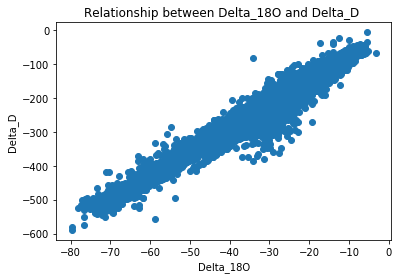

In [4]:
# Scatter plot the data to see if a linear trend exists

plt.scatter(X, y)

plt.xlabel("Delta_18O")
plt.ylabel("Delta_D")
plt.title("Relationship between Delta_18O and Delta_D ")

print("A linear trend exist between Delta_18O and Delta_D water")


In [5]:
mega_df=mega_df.head(500)
X = mega_df["Delta_18O"].values.reshape(-1, 1)
y = mega_df["Delta_D"].values.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [6]:
#Train the model using the training data
model.fit(X_train, y_train)


# Use our model to make Hydrogen Isotope Prediction
predicted = model.predict(X_test)

""" 
Score the predictions with mse and r2
Calculate the mean_squared_error and the r-squared value
 for the testing data """

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicted)

r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

#And score the model using the unseen testing data
model.score(X_test, y_test)


Mean Squared Error (MSE): 128.09062293227183
R-squared (R2 ): 0.9801120413258104


0.9801120413258104

The Global  Water Line shows that the water isotope 
      values do not converge along a single straight line. 
      There are some branches that diverge from the main fitted line.
      This phenomenon suggests that different  water lines prevail in different regions. 


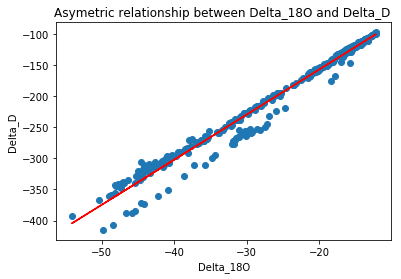

In [7]:
"""We can view the coefficients and intercept of the line from the coef_ and intercept_ attributes.
#Note that the _ suffix indicates that the attribute is available after model is fit to the data (trained)."""

a=model.coef_
b=model.intercept_
y_predict = a*X_train + b

plt.scatter(X_train,y_train)
plt.plot(X_train, y_predict, color="r")

plt.xlabel("Delta_18O")
plt.ylabel("Delta_D")
plt.title("Asymetric relationship between Delta_18O and Delta_D ")
print("""The Global  Water Line shows that the water isotope 
      values do not converge along a single straight line. 
      There are some branches that diverge from the main fitted line.
      This phenomenon suggests that different  water lines prevail in different regions. """)

In [8]:
error=predicted - y_test


In [9]:
df =pd.DataFrame({"Predicted": predicted.reshape(-1,), "Actual": y_test.reshape(-1,), "Error": error.reshape(-1,)})
df.head(5)

,Predicted,Actual,Error
0,-196.890568,-194.380667,-2.509901
1,-296.756791,-284.163667,-12.593124
2,-149.758155,-147.041500,-2.716655
3,-141.915232,-140.571500,-1.343732
4,-284.322124,-280.853333,-3.468791


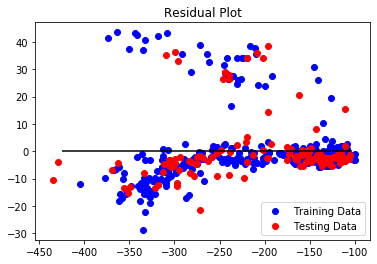

In [10]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
#predictions = model.predict(X_test_scaled)
#model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()